import module

In [1]:
import pandas as pd
from datetime import datetime, timedelta
#from yfinance import stock_info as si
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

from datetime import datetime

import math
from datetime import date, timedelta
import matplotlib.pyplot as plt



ambil historical data dari yahoo finance selama 1 tahun terakhir

In [2]:
KODE = 'TLKM.JK'
today_date = date.today()

td = timedelta(365)
mulai = today_date - td

#df = yf.download(KODE, period="max", auto_adjust=True)


df = yf.download(KODE, start=mulai, end = today_date+timedelta(1))

df.shape

[*********************100%***********************]  1 of 1 completed


(248, 6)

prepocessing data, filter kolom close saja

In [3]:
data = df.filter(['Close'])
data.head()

,Close
Date,
2022-05-17 00:00:00+07:00,4180.0
2022-05-18 00:00:00+07:00,4250.0
2022-05-19 00:00:00+07:00,4210.0
2022-05-20 00:00:00+07:00,4170.0
2022-05-23 00:00:00+07:00,4110.0


In [4]:
#convert data to array
dataset = data.values
dataset

array([[4180.],
       [4250.],
       [4210.],
       [4170.],
       [4110.],
       [4150.],
       [4200.],
       [4300.],
       [4250.],
       [4310.],
       [4290.],
       [4310.],
       [4340.],
       [4250.],
       [4100.],
       [4050.],
       [4020.],
       [4080.],
       [4110.],
       [4060.],
       [4040.],
       [4120.],
       [4040.],
       [4110.],
       [4050.],
       [4160.],
       [4150.],
       [4070.],
       [4030.],
       [4040.],
       [4000.],
       [4020.],
       [3990.],
       [3990.],
       [4020.],
       [4040.],
       [4010.],
       [4040.],
       [4010.],
       [3940.],
       [4020.],
       [4150.],
       [4190.],
       [4160.],
       [4210.],
       [4260.],
       [4230.],
       [4240.],
       [4250.],
       [4300.],
       [4240.],
       [4230.],
       [4300.],
       [4450.],
       [4500.],
       [4550.],
       [4650.],
       [4700.],
       [4640.],
       [4560.],
       [4570.],
       [4550.],
       [

Scale the data using MinMaxScaler

In [5]:
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .9)
training_data_len

224

In [6]:
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.50434783],
       [0.56521739],
       [0.53043478],
       [0.49565217],
       [0.44347826],
       [0.47826087],
       [0.52173913],
       [0.60869565],
       [0.56521739],
       [0.6173913 ],
       [0.6       ],
       [0.6173913 ],
       [0.64347826],
       [0.56521739],
       [0.43478261],
       [0.39130435],
       [0.36521739],
       [0.4173913 ],
       [0.44347826],
       [0.4       ],
       [0.3826087 ],
       [0.45217391],
       [0.3826087 ],
       [0.44347826],
       [0.39130435],
       [0.48695652],
       [0.47826087],
       [0.40869565],
       [0.37391304],
       [0.3826087 ],
       [0.34782609],
       [0.36521739],
       [0.33913043],
       [0.33913043],
       [0.36521739],
       [0.3826087 ],
       [0.35652174],
       [0.3826087 ],
       [0.35652174],
       [0.29565217],
       [0.36521739],
       [0.47826087],
       [0.51304348],
       [0.48695652],
       [0.53043478],
       [0.57391304],
       [0.54782609],
       [0.556

split data
create training dataset
create test dataset

In [7]:
# Split the data into training and testing sets
train_data = scaled_data[:int(data.shape[0]*0.9)]
test_data = scaled_data[int(data.shape[0]*0.9):]

x_train = []
y_train = []

for i in range(60,len (train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.50434783, 0.56521739, 0.53043478, 0.49565217, 0.44347826,
       0.47826087, 0.52173913, 0.60869565, 0.56521739, 0.6173913 ,
       0.6       , 0.6173913 , 0.64347826, 0.56521739, 0.43478261,
       0.39130435, 0.36521739, 0.4173913 , 0.44347826, 0.4       ,
       0.3826087 , 0.45217391, 0.3826087 , 0.44347826, 0.39130435,
       0.48695652, 0.47826087, 0.40869565, 0.37391304, 0.3826087 ,
       0.34782609, 0.36521739, 0.33913043, 0.33913043, 0.36521739,
       0.3826087 , 0.35652174, 0.3826087 , 0.35652174, 0.29565217,
       0.36521739, 0.47826087, 0.51304348, 0.48695652, 0.53043478,
       0.57391304, 0.54782609, 0.55652174, 0.56521739, 0.60869565,
       0.55652174, 0.54782609, 0.60869565, 0.73913043, 0.7826087 ,
       0.82608696, 0.91304348, 0.95652174, 0.90434783, 0.83478261])]
[0.8434782608695652]

[array([0.50434783, 0.56521739, 0.53043478, 0.49565217, 0.44347826,
       0.47826087, 0.52173913, 0.60869565, 0.56521739, 0.6173913 ,
       0.6       , 0.6173913 , 0.643

In [8]:
#convert x_train & y_train to numpy arrays
x_train , y_train = np.array(x_train),np.array(y_train)


In [9]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(163, 60, 1)

# build the LSTM model

In [10]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))




# compile the model

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model

In [12]:
model.fit(x_train,y_train,batch_size=1,epochs=30)

Epoch 1/30
163/163 [==============================] - 5s 15ms/step - loss: 0.0155
Epoch 2/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0084
Epoch 3/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0060
Epoch 4/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0068
Epoch 5/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0066
Epoch 6/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0062
Epoch 7/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0065
Epoch 8/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0053
Epoch 9/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0071
Epoch 10/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0064
Epoch 11/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0051
Epoch 12/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0053
Epoch 13/30
1

# create testing dataset
# Create a new array contain

In [13]:
test_data= scaled_data[training_data_len - 60:,:]
#create the data sets x_test & y_test
x_test=[]
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [14]:
#convert the data into numpy array
x_test = np.array(x_test)


In [15]:
#reshape the data to 3D model
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [16]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


1/1 [==============================] - 1s 552ms/step


In [17]:
#evaluate the models
# get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

33.31842041015625

C:\Users\User\AppData\Local\Temp\ipykernel_7504\4103631039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


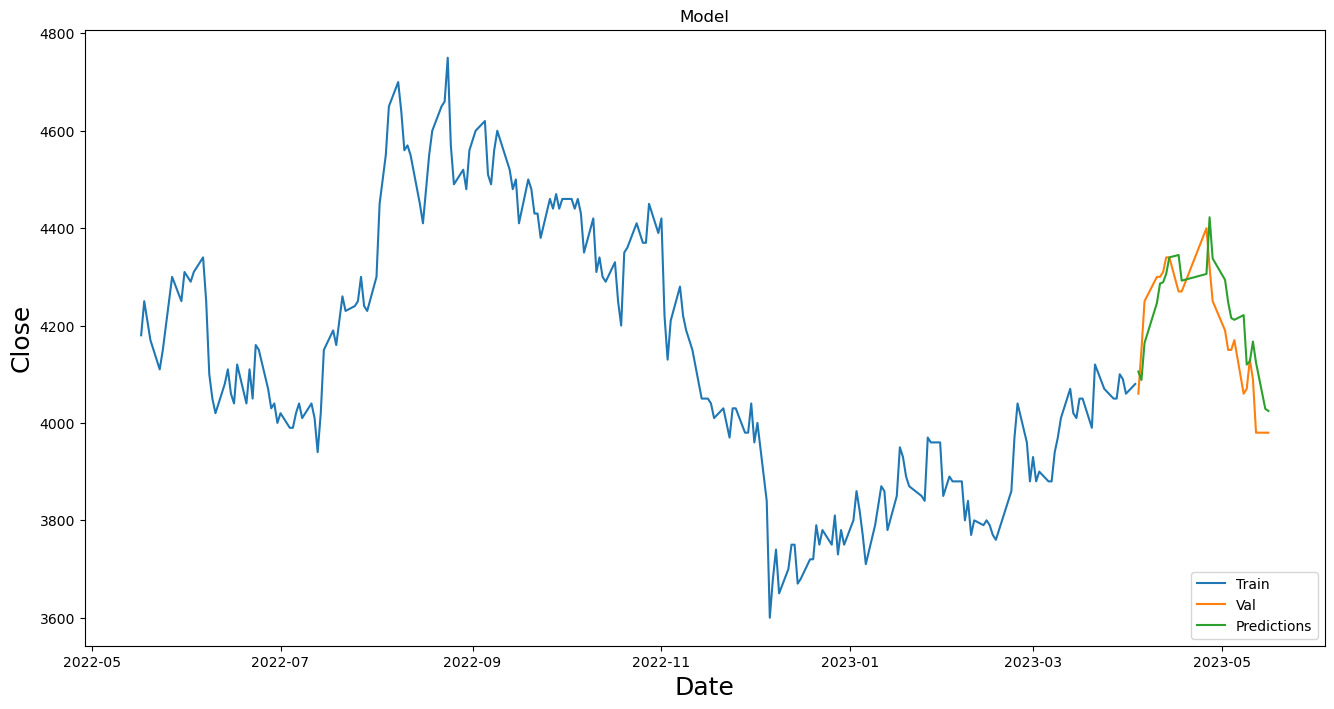

In [21]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

plt.legend (['Train','Val','Predictions'],loc='lower right')

plt.show()



In [22]:
data

,Close
Date,
2022-05-17 00:00:00+07:00,4180.0
2022-05-18 00:00:00+07:00,4250.0
2022-05-19 00:00:00+07:00,4210.0
2022-05-20 00:00:00+07:00,4170.0
2022-05-23 00:00:00+07:00,4110.0
...,...
2023-05-10 00:00:00+07:00,4130.0
2023-05-11 00:00:00+07:00,4090.0
2023-05-12 00:00:00+07:00,3980.0


In [19]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-04-04 00:00:00+07:00,4060.0,4105.435547
2023-04-05 00:00:00+07:00,4150.0,4088.247803
2023-04-06 00:00:00+07:00,4250.0,4164.316895
2023-04-10 00:00:00+07:00,4300.0,4246.308105
2023-04-11 00:00:00+07:00,4300.0,4286.280762
2023-04-12 00:00:00+07:00,4310.0,4288.884277
2023-04-13 00:00:00+07:00,4340.0,4306.395508
2023-04-14 00:00:00+07:00,4340.0,4339.962891
2023-04-17 00:00:00+07:00,4270.0,4344.917969


In [20]:
#get the quote
stocks = 

SyntaxError: invalid syntax (2975511602.py, line 2)

# Generate time series data for LSTM
n_input = 30
n_features = 1
generator = TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=16)


Generate time series data for LSTM

Define the LSTM model

# Define the LSTM model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model

# Train the model
model.fit_generator(generator, epochs=180)